#  Quadratic Drag with Experimental Data

## 1-D Vertical motion in a gravitational field

Most of this section is taken from *Project 1: The Euler Method* by Steve Spicklemire

In [8]:
import numpy as np

# to plot our result
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (14,10)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14


The goal is to use the Euler-Cromer method to estimate the drag parameter $c$ for modeling an object in free-fall with quadratic air resistance.

Using data from this slide: <http://www.cabrillo.edu/~dbrown/tracker/air_resistance.pdf>

Assigning upward direction t positive value, the motion of a free fall object is described by the folloqinf differential equation 

$$ +c v^2 - m g = m \frac{dv}{dt}$$

you will estimate the value of the parameter $c$. Assume the mass is $m\approx 3.5\,{\rm g}$ and $g\approx 9.8\,{\rm m/s/s}$. Assume the cup is released from rest.

Below you will find most of the code already worked out as a detailed example. You need to read the code and understand what it's doing.


In [9]:
#
# Here is the raw data for the position of the muffin cup as a function of time. Use the "split" function to break it into
# a list of (possibly empty) strings.
#

data = """
0.000000000E0	-2.688162330E0
3.336670003E-2	-4.301059729E0
6.673340007E-2	-5.376324661E0
1.001001001E-1	-6.989222059E0
1.334668001E-1	-1.129028179E1
1.668335002E-1	-1.451607658E1
2.002002002E-1	-2.043003371E1
2.335669002E-1	-2.526872591E1
2.669336003E-1	-3.118268303E1
3.003003003E-1	-3.870953756E1
3.336670003E-1	-4.623639208E1
3.670337004E-1	-5.430087907E1
4.004004004E-1	-6.236536606E1
4.337671004E-1	-7.150511799E1
4.671338005E-1	-8.010723744E1
5.005005005E-1	-8.924698937E1
5.338672005E-1	-9.892437376E1
5.672339006E-1	-1.080641257E2
6.006006006E-1	-1.177415101E2
6.339673006E-1	-1.274188945E2
6.673340007E-1	-1.370962788E2
7.007007007E-1	-1.467736632E2
7.340674007E-1	-1.575263126E2
7.674341008E-1	-1.672036969E2
8.008008008E-1	-1.768810813E2
8.341675008E-1	-1.865584657E2
8.675342009E-1	-1.973111150E2
9.009009009E-1	-2.075261319E2
9.342676009E-1	-2.182787812E2
9.676343010E-1	-2.284937981E2
""".split('\n')  # split this string on the "newline" character.

print(data)


['', '0.000000000E0\t-2.688162330E0', '3.336670003E-2\t-4.301059729E0', '6.673340007E-2\t-5.376324661E0', '1.001001001E-1\t-6.989222059E0', '1.334668001E-1\t-1.129028179E1', '1.668335002E-1\t-1.451607658E1', '2.002002002E-1\t-2.043003371E1', '2.335669002E-1\t-2.526872591E1', '2.669336003E-1\t-3.118268303E1', '3.003003003E-1\t-3.870953756E1', '3.336670003E-1\t-4.623639208E1', '3.670337004E-1\t-5.430087907E1', '4.004004004E-1\t-6.236536606E1', '4.337671004E-1\t-7.150511799E1', '4.671338005E-1\t-8.010723744E1', '5.005005005E-1\t-8.924698937E1', '5.338672005E-1\t-9.892437376E1', '5.672339006E-1\t-1.080641257E2', '6.006006006E-1\t-1.177415101E2', '6.339673006E-1\t-1.274188945E2', '6.673340007E-1\t-1.370962788E2', '7.007007007E-1\t-1.467736632E2', '7.340674007E-1\t-1.575263126E2', '7.674341008E-1\t-1.672036969E2', '8.008008008E-1\t-1.768810813E2', '8.341675008E-1\t-1.865584657E2', '8.675342009E-1\t-1.973111150E2', '9.009009009E-1\t-2.075261319E2', '9.342676009E-1\t-2.182787812E2', '9.6763430

In [10]:
#
# Here we'll take the list of strings defined above and break it into actual numbers in 
# mks units.
#

tlist = []
ylist = []
for s in data:
    if s:
        t,y = s.split()     # break string in two
        t=float(t)          # convert time to float
        y=float(y)/100.0    # convert distance to meters 
        tlist.append(t)
        ylist.append(y)
        
print("tlist=",tlist)
print("ylist=",ylist)


tlist= [0.0, 0.03336670003, 0.06673340007, 0.1001001001, 0.1334668001, 0.1668335002, 0.2002002002, 0.2335669002, 0.2669336003, 0.3003003003, 0.3336670003, 0.3670337004, 0.4004004004, 0.4337671004, 0.4671338005, 0.5005005005, 0.5338672005, 0.5672339006, 0.6006006006, 0.6339673006, 0.6673340007, 0.7007007007, 0.7340674007, 0.7674341008, 0.8008008008, 0.8341675008, 0.8675342009, 0.9009009009, 0.9342676009, 0.967634301]
ylist= [-0.0268816233, -0.04301059729, -0.05376324661, -0.06989222059, -0.1129028179, -0.1451607658, -0.2043003371, -0.2526872591, -0.3118268303, -0.3870953756, -0.4623639208, -0.5430087907, -0.6236536606, -0.7150511799, -0.8010723744, -0.8924698937, -0.9892437376, -1.0806412570000001, -1.177415101, -1.274188945, -1.370962788, -1.4677366319999998, -1.575263126, -1.672036969, -1.768810813, -1.865584657, -1.97311115, -2.075261319, -2.182787812, -2.284937981]


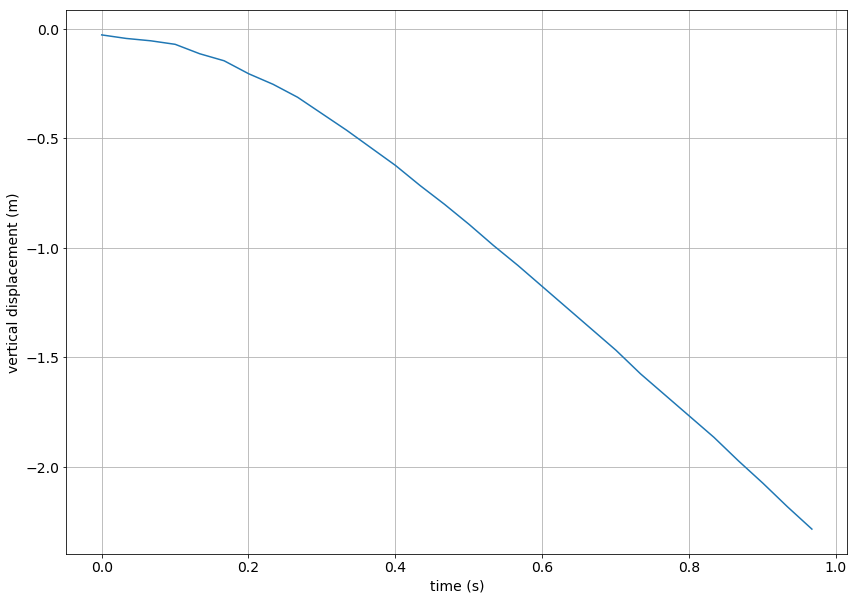

In [19]:
plt.plot(tlist, ylist)
plt.ylabel('vertical displacement (m)')
plt.xlabel('time (s)')
plt.grid()
plt.show()

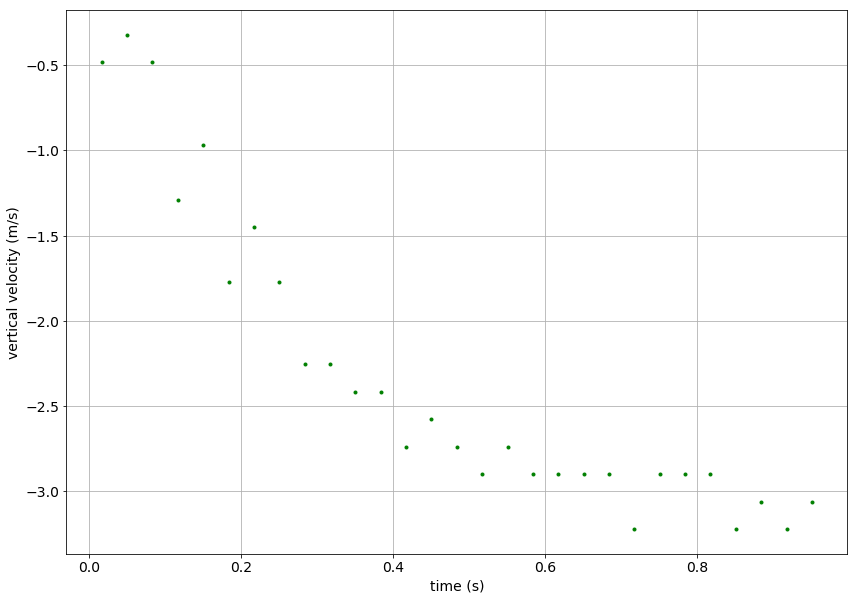

In [18]:
vlist = []  # Velocity list (computed velocities from experimental data)
tvlist = []  # time list (times for corresponding velocities)

for i in range(1,len(tlist)):
    dy=ylist[i]-ylist[i-1]
    dt=tlist[i]-tlist[i-1]
    averageTime=(tlist[i]+tlist[i-1])/2.0
    
    vlist.append(dy/dt)
    tvlist.append(averageTime)
    
plt.plot(tvlist,vlist,'g.')
plt.ylabel('vertical velocity (m/s)')
plt.xlabel('time (s)')
plt.grid()
plt.show()

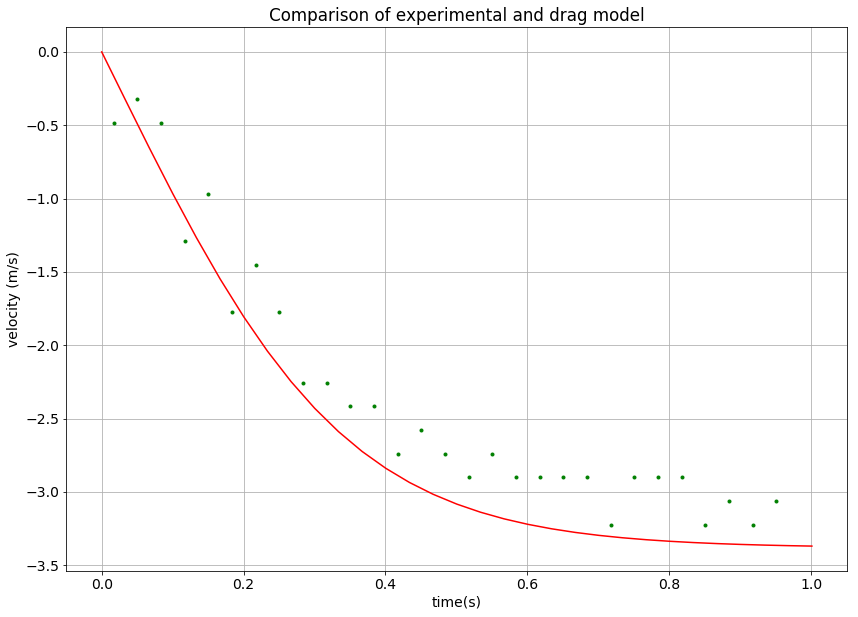

In [17]:
m=0.0035  # kg
g=9.80     # m/s
b=0.003    # total guess, need to improve

v=0.0     # start with zero velocity (m/s)

dt = (tlist[-1]-tlist[0])/(len(tlist)-1)  # time per frame in original video in seconds
t=0.0

vclist = [v]
tclist = [t]

def deriv(v, t):
    return b*v**2/m - g

for i in range(len(tlist)):
    dv = deriv(v,t)*dt
    v += dv
    t += dt
    
    vclist.append(v)
    tclist.append(t)
    
plt.title("Comparison of experimental and drag model")
plt.xlabel("time(s)")
plt.ylabel("velocity (m/s)")
plt.plot(tclist, vclist, 'r-',tvlist,vlist,'g.')
plt.grid()
plt.show()


So, clearly our initial guess of "b" was too small. Try again!